### Visualização de Dados em Python

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
import seaborn as sns

1. Gráfico de Linha Padrão

O gráfico mais simples e fundamental é o gráfico de linha padrão. A função espera dois arrays como entrada, x e y, ambos do mesmo tamanho. x é tratado como uma variável independente e y como a dependente. O gráfico é plotado como segmentos de linha mais curtos conectando os pares de pontos x,y ordenados em termos da variável x.

In [ ]:
plt.plot(x, y)

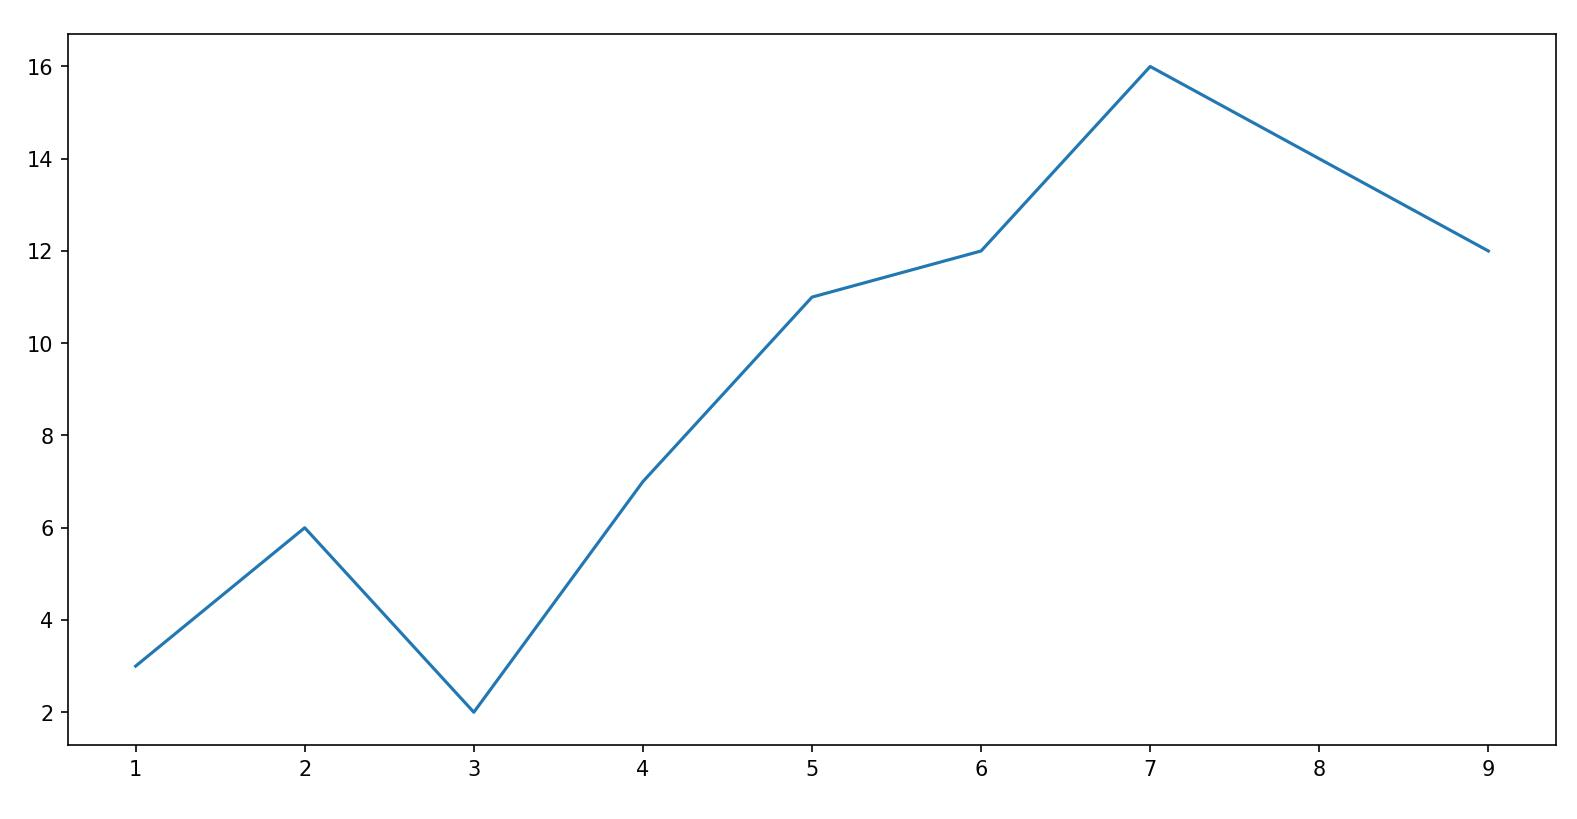

2. Gráfico de Dispersão

Gráficos de dispersão são gráficos que apresentam a relação entre duas variáveis em um conjunto de dados. Eles representam pontos de dados em um plano bidimensional. A variável ou atributo independente é plotado no eixo X, enquanto a variável dependente é plotada no eixo Y.

Gráficos de dispersão são usados em qualquer uma das seguintes situações:

* Quando temos dados numéricos emparelhados
* Quando há múltiplos valores da variável dependente para um único valor de uma variável independente
* Para determinar a relação entre variáveis em alguns cenários

In [ ]:
plt.scatter(x, y)

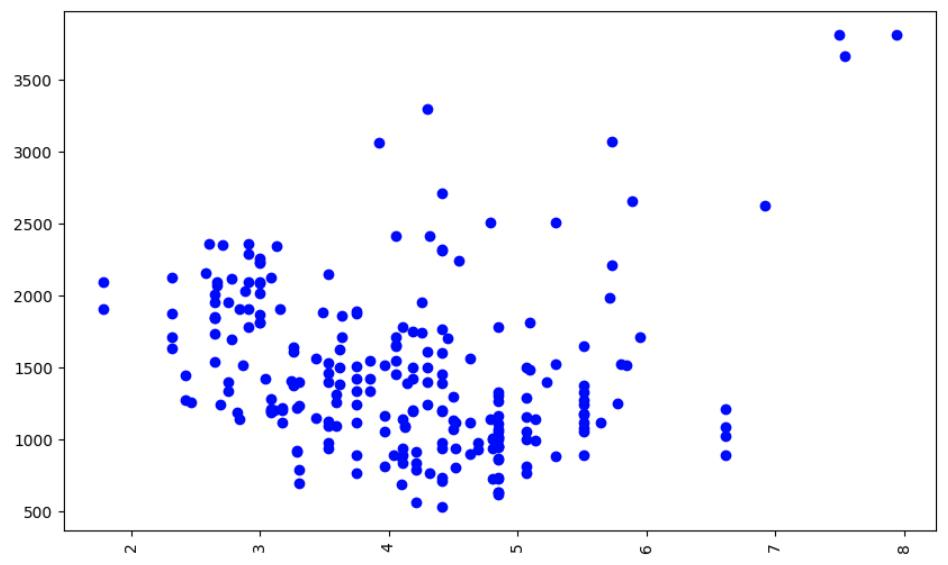

3. Histograma

Um histograma é uma representação visual importante de dados em forma categórica. Para visualizar os dados em uma forma "agrupada em intervalos", podemos usar o gráfico de histograma com um número de intervalos (bins) necessários ou mesmo com os pontos de dados que marcam as bordas dos intervalos. O eixo x representa os intervalos de dados, e o eixo y representa o número de elementos em cada um dos intervalos.

In [ ]:
plt.hist(x, bins)

# pode-se usar um argumento de edgecolor para mudar a cor das bordas das barras do histograma

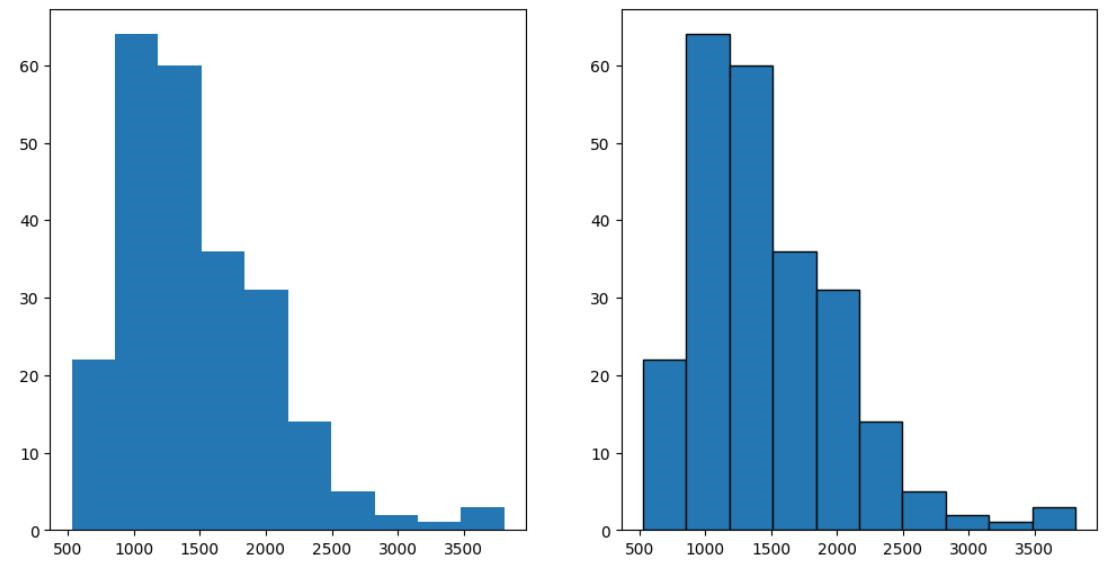

4. Gráfico de Barras

Um gráfico de barras é usado para visualizar dados categóricos. O eixo y representa o valor médio dos pontos de dados pertencentes a uma categoria específica, enquanto o eixo x representa o número de elementos nas diferentes categorias.

In [ ]:
plt.bar(x, height)

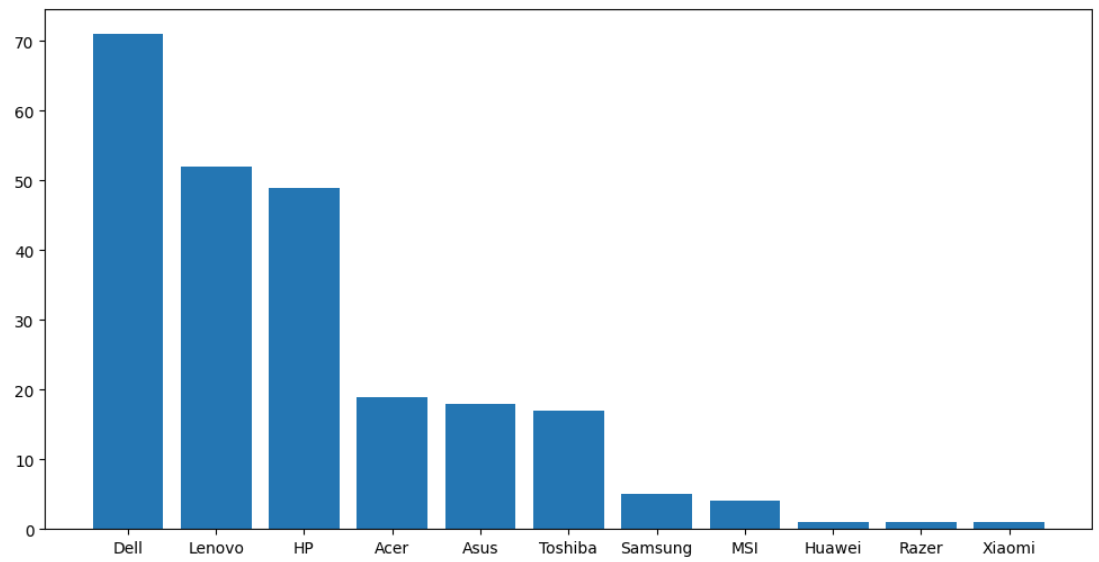

5. Gráfico de Pseudo Cores

Um gráfico de pseudo cores exibe dados de matriz como um array de células coloridas (conhecidas como faces). Este gráfico é criado como uma superfície plana no plano x-y. A superfície é definida por uma grade de coordenadas x e y que correspondem aos cantos (ou vértices) das faces. A matriz C especifica as cores nos vértices. A cor de cada face depende da cor de um de seus quatro vértices circundantes. Dos quatro vértices, aquele que vem primeiro na grade x-y determina a cor da face.

Neste curso, você usa o gráfico pcolor para visualizar o conteúdo de uma tabela dinâmica que foi agrupada com base em 2 parâmetros. Esses parâmetros então representam os componentes dos eixos x e y que criam a grade. Os valores na tabela dinâmica são os valores médios de um terceiro parâmetro. Esses valores atuam como o código para a cor que a célula vai assumir.

In [ ]:
plt.pcolor(C)

Você pode definir um argumento adicional cmap para especificar o esquema de cores do gráfico.

Dois exemplos de gráficos pcolor são mostrados abaixo, criados para os mesmos dados mas com diferentes esquemas de cores.

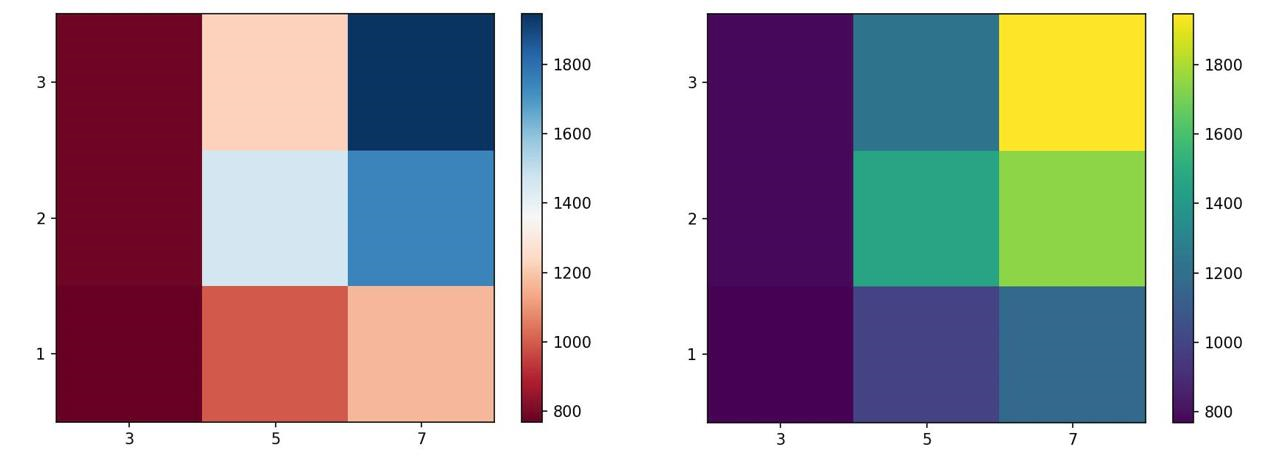

#### Funções do Seaborn

1. Gráfico de Regressão

Um gráfico de regressão desenha um gráfico de dispersão de duas variáveis, x e y, e então ajusta o modelo de regressão e plota a linha de regressão resultante junto com um intervalo de confiança de 95% para essa regressão. Os parâmetros x e y podem ser compartilhados como os cabeçalhos do dataframe a serem usados, e o próprio dataframe também é passado para a função.

In [ ]:
sns.regplot(x = 'header_1', y = "header_2", data=df)

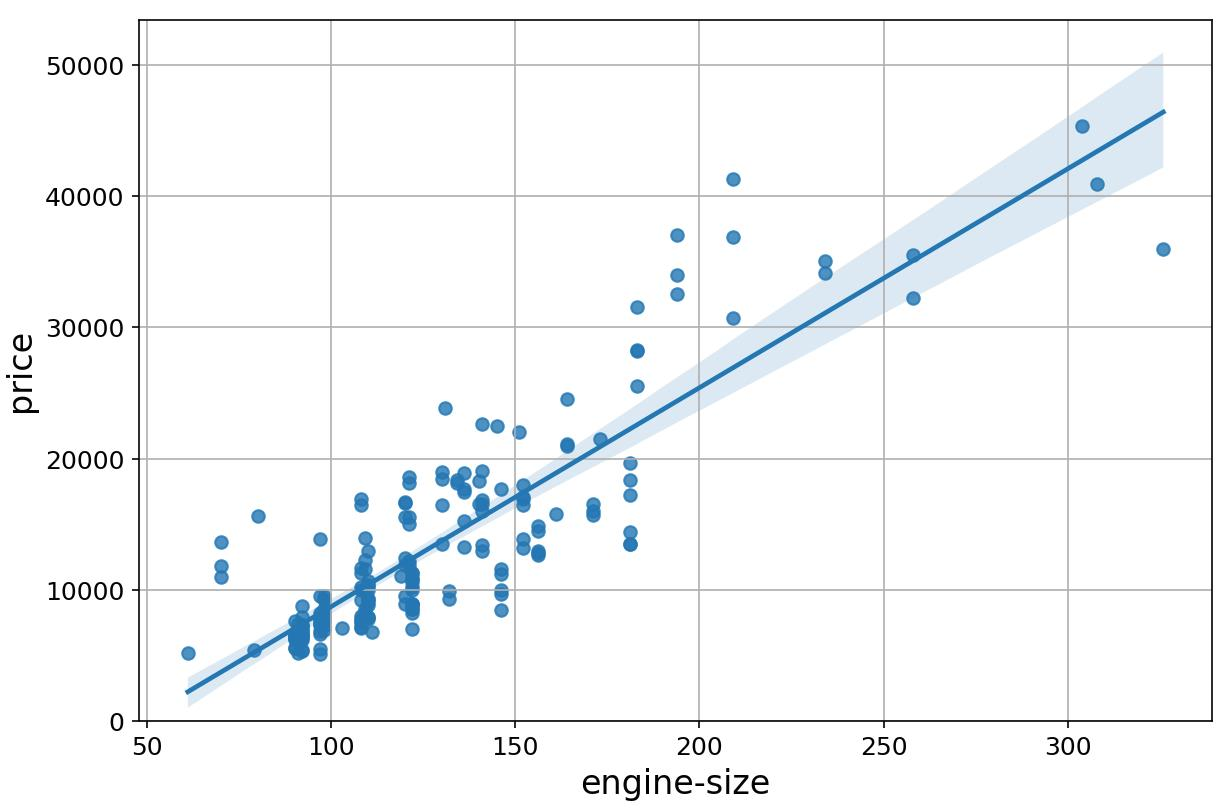

2. Gráfico de Resíduos

Um gráfico de resíduos é usado para exibir a qualidade da regressão polinomial. Esta função fará a regressão de y em x como uma regressão polinomial e então desenhará um gráfico de dispersão dos resíduos.
Resíduos são as diferenças entre os valores observados da variável dependente e os valores previstos obtidos do modelo de regressão. Em outras palavras, um resíduo é uma medida de quanto uma linha de regressão verticalmente erra um ponto de dados, ou seja, quão distantes as previsões estão dos pontos de dados reais.

In [ ]:
sns.residplot(data=df,x='header_1', y='header_2')

#ou

sns.residplot(x=df['header_1'], y=df['header_2'])

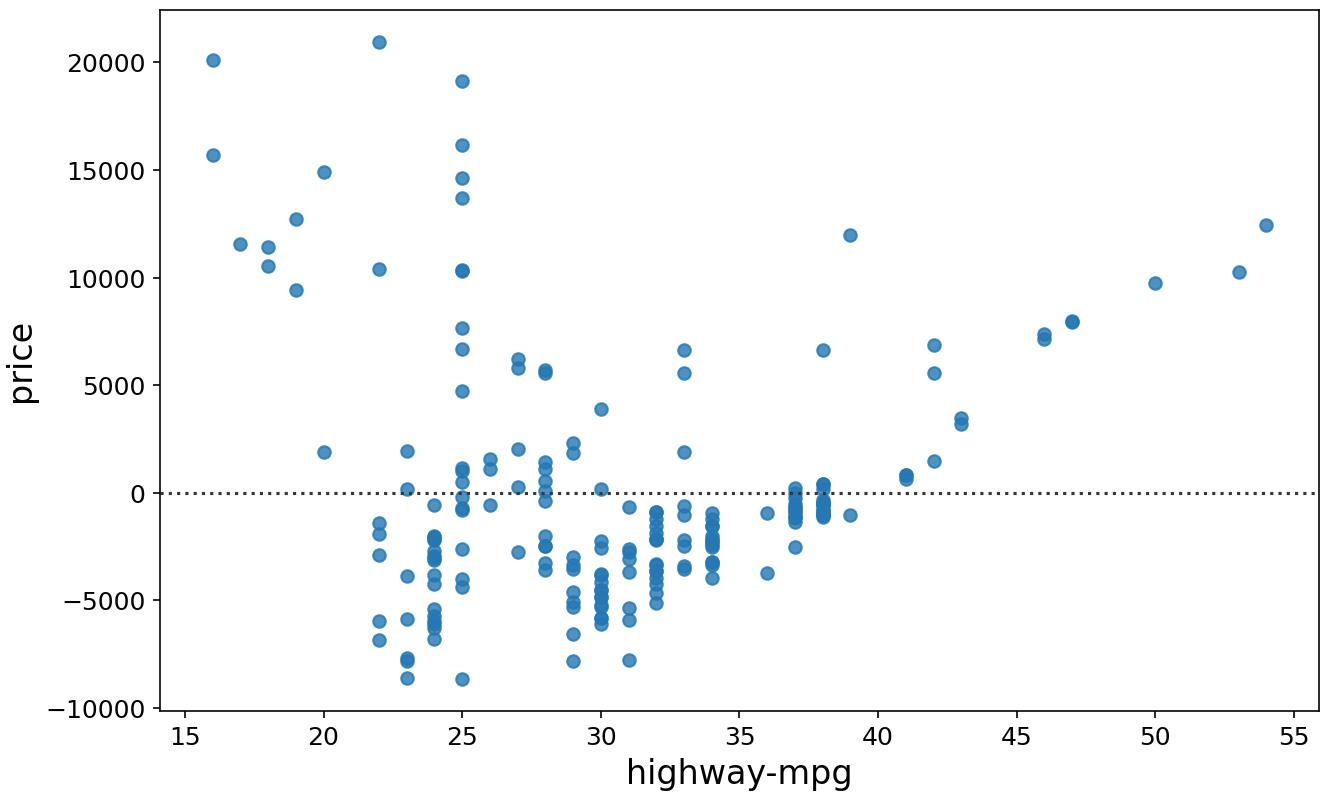

* Gráfico KDE

Um gráfico de Estimativa de Densidade de Kernel (KDE) é um gráfico que cria uma curva de distribuição de probabilidade para os dados com base em sua probabilidade de ocorrência em um valor específico. Isso é criado para um único vetor de informações. É usado no curso para comparar as curvas prováveis dos dados reais com as dos dados previstos.

In [ ]:
sns.kdeplot(X)

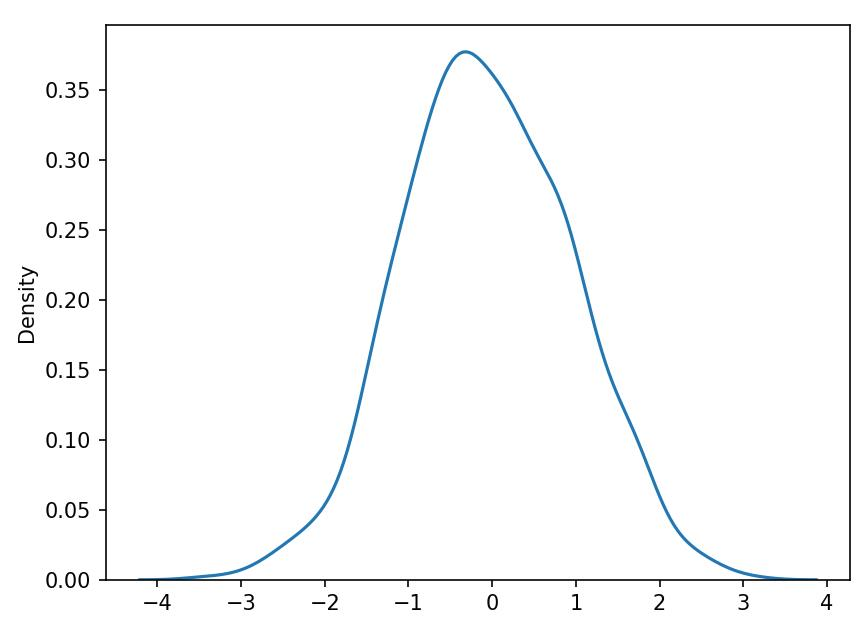

O código a seguir mostre como treinar um modelo simples de regressão linear, gerar previsões e visualizar os valores reais contra as distribuições geradas pelo gráfico KDE. Iremos usar dados sintéticos para simulara uma relação linear com barulho no fundo e dividir os dados em conjuntos de testing e training, e depois avaliaremos as previsões do modelo.

In [3]:
%pip install numpy pandas seaborn matplotlib scikit-learn --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


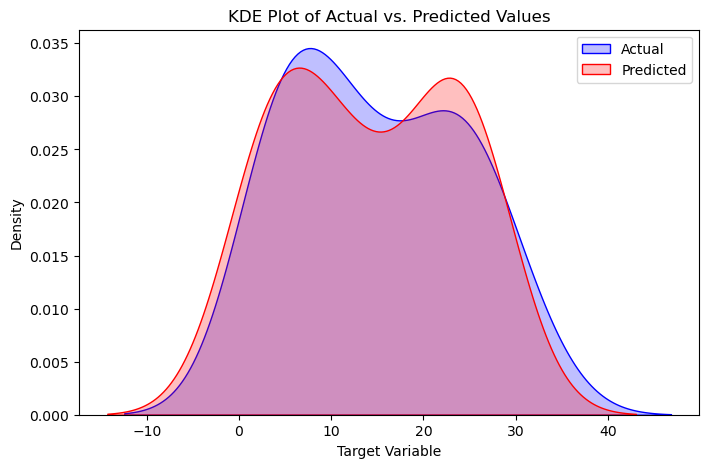

In [ ]:
import numpy as npy
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Generating Sample Data
npy.random.seed(42)
x = npy.random.rand(100) * 10
y = 3 * x + npy.random.normal(0, 3, 100)  # Linear relation with noise
data = pds.DataFrame({'X': x, 'Y': y})
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['Y'], test_size=0.2, random_state=42)
# Training a Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Plotting KDE for Observed vs. Predicted Values
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='red')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

* Gráfico de Distribuição

Este gráfico tem a capacidade de combinar o histograma e os gráficos KDE. Este gráfico cria a curva de distribuição usando os intervalos do histograma como referência para estimativa. Você pode opcionalmente manter ou descartar o histograma de ser exibido. No contexto do curso, este gráfico pode ser usado de forma intercambiável com o gráfico KDE.

In [ ]:
sns.distplot(X,hist=False)

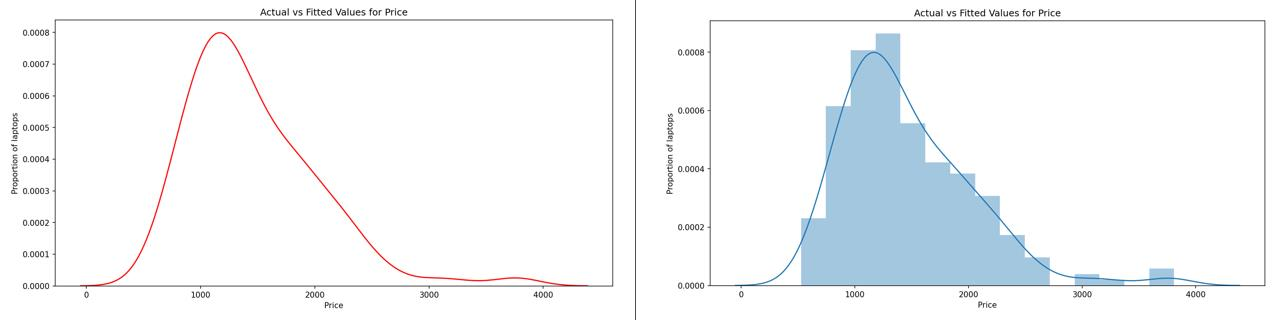